# **FrozenLake SARSA**

In [5]:
import gym
import numpy as np
import random

env = gym.make("FrozenLake-v0", map_name='4x4', is_slippery=False)

# Implementacja algorytmu

Algorytm wygląda następująco (**RL_teoria_5.pdf**):

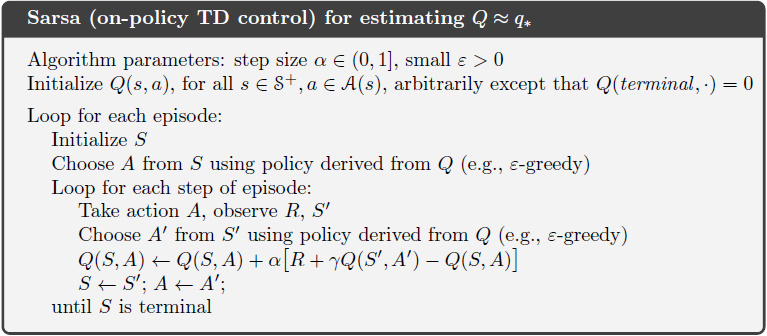

Funkcję **Q** inicjujemy **zerami** za pomocą tablicy o wymiarach **16x4**: 

In [6]:
Q = np.zeros([env.nS,env.nA])
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Definicja funkcji, która dla danego stanu **S** zwraca akcję zgodnie z **polityką epsilon-zachłanną**:

In [7]:
def epsilon_greedy_action(env,Q,state,epsilon=0.3):
    n = random.uniform(0,1)
    if n<= epsilon:
        return np.random.randint(env.action_space.n)
    else:
        return np.argmax(Q[state])

**Objaśnienie**: losujemy liczbę **n** z przedziału **(0,1)**. Jeżeli **n<=epsilon** wówczas funkcja zwraca **losową akcję**. Jeżeli **n>epsilon** wówczas funkcja zwraca **akcję o największym przewidywanym zwrocie**.  

# Polecenie 1 (do uzupełnienia)

Uzupełnij poniższą funkcję implementującą algorytm **SARSA**:

In [24]:
def SARSA(env, episodes=1000, gamma=0.99, alpha=0.1):
    
    Q = np.zeros([env.nS,env.nA])

    rewards=0

    for i in range(episodes):    

        done = False
        env.reset()
               
        S = env.s
        #a_ = epsilon_greedy_action(env,Q, S, 0.3)
        while not done:
            a = epsilon_greedy_action(env,Q, S, 0.3)
            new_s, reward, done, info = env.step(a)
            
            
            Q[S][a] = Q[S][a] + alpha * (reward + gamma * np.max(Q[new_s]) - Q[S][a])
            S = new_s
           # a = a     

       #DO UZUPEŁNIENIA
            
    return Q  

Test:

In [25]:
Q = SARSA(env,10000)
print(Q)   

[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.82902389 0.9079852 ]
 [0.92764896 0.45439682 0.         0.17281361]
 [0.         0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.81291519]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.96059601 0.9801     0.        ]
 [0.970299   0.99       0.         0.97029899]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.93878692 0.9676699  0.970299  ]
 [0.96059601 0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


# Polecenie 2 (do uzupełnienia)

Przestestuj działanie algorytmu **SARSA** dla dwóch wartości parametru gamma (**0.1** i **0.99**) i różnych ilości epok. Jak oceniasz działanie algorytmu? Czy wybór w każdym stanie akcji związanej z największym zwrotem gwarantuje dotarcie do celu?

Jak oceniasz działanie algorytmu?
Algorytm działa w obu przypadkach. 


Czy wybór w każdym stanie akcji związanej z największym zwrotem gwarantuje dotarcie do celu?
Gwarantuje dotarcie do celu.

In [ ]:
SARSA(env, episodes=1000, gamma=0.1, alpha=0.1)
Q = SARSA(env,10000)
print(Q) 

[[0.50415467 0.57161423 0.51416407 0.51118515]
 [0.49258669 0.         0.58648928 0.43322852]
 [0.46254536 0.7154163  0.49635067 0.57840389]
 [0.5458209  0.         0.54206109 0.34614469]
 [0.54154728 0.65461694 0.         0.49790315]
 [0.         0.         0.         0.        ]
 [0.         0.75238373 0.         0.61960977]
 [0.         0.         0.         0.        ]
 [0.65009258 0.         0.78958819 0.61329648]
 [0.68370392 0.87403161 0.70290789 0.        ]
 [0.82884282 0.98046769 0.         0.64913449]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.75260957 0.97619565 0.83754207]
 [0.91422565 0.97291043 1.         0.91975641]
 [0.         0.         0.         0.        ]]


In [ ]:
SARSA(env, episodes=1000, gamma=0.99, alpha=0.1)
Q = SARSA(env,10000)
print(Q) 

[[0.48489519 0.4867541  0.60235543 0.52107008]
 [0.53841421 0.         0.67177176 0.54219601]
 [0.53793536 0.66914306 0.48100269 0.63104978]
 [0.61830146 0.         0.22132381 0.33434805]
 [0.53563929 0.67959998 0.         0.52296381]
 [0.         0.         0.         0.        ]
 [0.         0.82146138 0.         0.65614288]
 [0.         0.         0.         0.        ]
 [0.68892257 0.         0.77443572 0.49998267]
 [0.66096052 0.83181041 0.77753908 0.        ]
 [0.78674553 0.96052743 0.         0.63368336]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81996499 0.96676029 0.73282526]
 [0.88072453 0.93943483 1.         0.89989809]
 [0.         0.         0.         0.        ]]


(DO UZUEPEŁNIENIA)

# Polecenie 3 (do uzupełnienia)

Napisz funkcję, która w oparciu o funkcję Q dla każdego stanu zwróci akcję o szacowanym najwyższym zwrocie.  

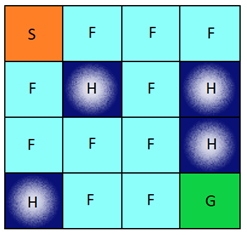

Akcje: **LEFT = 0**, **DOWN = 1**, **RIGHT = 2**, **UP = 3** 

(DO UZUPEŁNIENIA)

In [ ]:
def get_action_epsilon_greedy(env,epsilon,Q,state):
    return lambda Q,State: epsilon_greedy_action(env,Q, State, 0.3)

In [ ]:
def epsilon_greedy_action(env,Q,state,epsilon=0.3):
    n = random.uniform(0,1)
    if n<= epsilon:
        return np.random.randint(env.action_space.n)
    else:
        return np.argmax(Q[state])

In [ ]:
def best_action_epsilon_greedy(env,epsilon,Q,state):
    return np.argmax(Q[state])

In [ ]:
SARSA(env, episodes=1000, gamma=0.99, alpha=0.1)
Q = SARSA(env,10000)
print(Q) 

[[0.55965872 0.56485711 0.47309111 0.50091992]
 [0.58460747 0.         0.43014839 0.50787648]
 [0.47537003 0.43807399 0.13979378 0.355701  ]
 [0.28189287 0.         0.         0.04442319]
 [0.64703297 0.71851732 0.         0.59350637]
 [0.         0.         0.         0.        ]
 [0.         0.79497954 0.         0.3811712 ]
 [0.         0.         0.         0.        ]
 [0.6662654  0.         0.78255351 0.64530969]
 [0.65849721 0.82329269 0.87864966 0.        ]
 [0.76743413 0.9721436  0.         0.51273395]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.83643158 0.95885178 0.75460556]
 [0.89539384 0.96746002 1.         0.86785171]
 [0.         0.         0.         0.        ]]
